In [1]:
import os
os.environ.get('CONDA_DEFAULT_ENV')

'pipest'

In [2]:
from pipest.impact.bacrymuzy import test

openmp.omp_get_max_threads(): 4


Notice the considerable difference between enforcing and not enforcing price symmetry. Expand on this in the paper

In [3]:
symbol="INTC"                                                                                       
date="2019-01-23"                                                                                   
time_window="36000-50400"
enforce_price_symmetry=True
type_of_liquid='constant_intensity'
initial_inventory=0.2                                                                              
liquidator_base_rate=0.035                                                                        
liquidator_control=0.01

In [4]:
model = test.simple(
        symbol=symbol,                                                                                   
        date=date,                                                                                       
        time_window=time_window,
        enforce_price_symmetry=enforce_price_symmetry,
        type_of_liquid = type_of_liquid,
        initial_inventory=initial_inventory,                                                             
        liquidator_base_rate=liquidator_base_rate,                                                       
        liquidator_control=liquidator_control,   
)

/home/claudio/pipest/pipest/impact/models/INTC/INTC_2019-01-23_36000-50400/INTC_sdhawkes_2019-01-23_36000-50400_corrections
I am enforcing price symmetry
Hawkes parameters have been set
Transition probabilities have been set. Price Asymmetry = 0.02580639425303292

date of run: 2021-04-25 at 21:03
I am measuring bacry-muzy impact
symbol=INTC, date=2019-01-23, time_window=36000-50400
stdout is being redirected to /home/claudio/pipest/pipest/impact/models/INTC/INTC_2019-01-23_36000-50400/INTC_sdhawkes_2019-01-23_36000-50400_corrections_bm0_readout

Ends on 2021-04-25 at 21:03



In [5]:
model.name_of_model

'INTC_sdhawkes_2019-01-23_36000-50400_corrections_bm0'

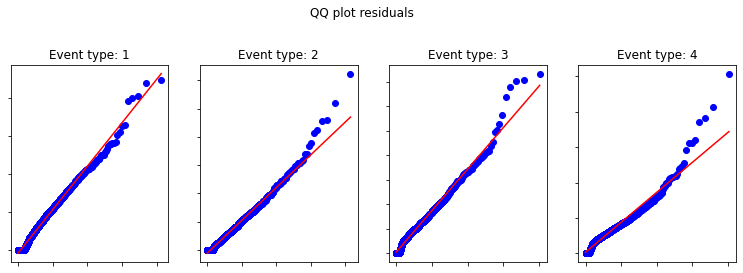

Anderson-Darling test to check distribution of residuals
Null hypothesis is "expon" 
Significance levels: [15.  10.   5.   2.5  1. ]
Critical values: [0.922 1.078 1.341 1.606 1.957]
event type=1, ad_stat: 1027.206360109115
event type=2, ad_stat: 852.3231895919516
event type=3, ad_stat: 239.03297485257553
event type=4, ad_stat: 316.29840697836244
None


In [6]:
model.goodness_of_fit.qq_plot_residuals(index_of_first_event_type=1,
                                        save_fig=False, path="./",)
print(model.goodness_of_fit.ad_test_on_residuals(index_of_first_event_type=1))

In [7]:
model.liquidator.print_info()

liquidator.initial_inventory: 0.2
liquidator.type_of_liquid: constant_intensity
liquidator.control_type: fraction_of_bid_side
liquidator.control: 0.01
liquidator.base_rate: 0.035
liquidator.start_time: 0.0
liquidator.termination_time: 1194.551452230471
liquidator.max_impact_profile: 0.2540307302021748


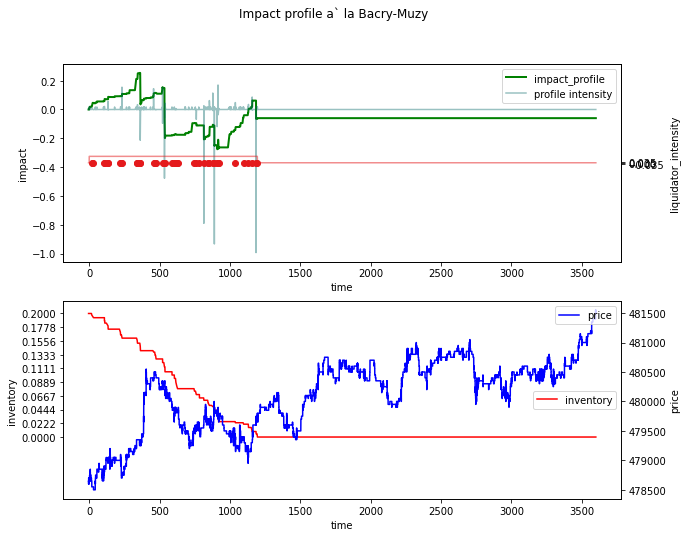

In [8]:
model.plot_bm_impact_profile(time_start=-5.0, time_end=3600.0, plot_bm_intensity=True)

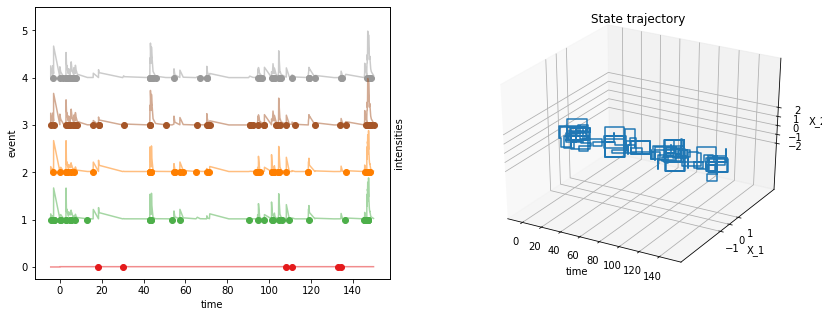

In [9]:
model.plot_events_and_states(t_0=-5.5,t_1=150.0, first_event_index=0)

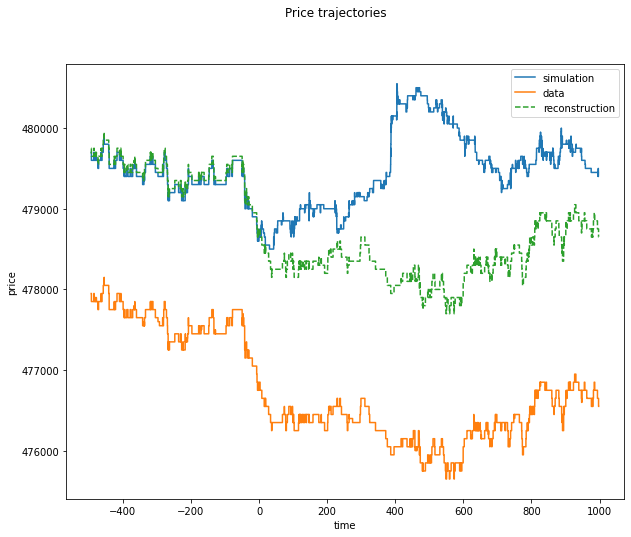

In [10]:
model.plot_price_trajectories(t0=-500, t1=1000)

In [11]:
model.inflationary_pressure

array([0.04493519, 0.04596653, 0.04942032, 0.03260287, 0.04001129,
       0.0544328 , 0.04630257, 0.04457406, 0.05288678])

In [12]:
model.deflationary_pressure

array([0.06479017, 0.06426883, 0.06264345, 0.06559671, 0.05756945,
       0.05195412, 0.07484849, 0.07244287, 0.07476843])

In [13]:
model.base_rates

array([0.035     , 0.09250151, 0.09250151, 0.00051933, 0.00051933])

In [14]:
model.transition_probabilities[:, 0, :3]

array([[0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ],
       [0.5, 0. , 0. ],
       [0. , 0. , 0. ],
       [0. , 0. , 0. ]])